# Final Project - Machine Learning - BIA-5302-0GA

In [143]:
#Import necessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier
from dmba import plotDecisionTree
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import log_loss

In [2]:
#Read csv file
attrition_df = pd.read_csv("attrition.csv")
attrition_df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [3]:
# Remove spaces from column headers
attrition_df.columns = [col.strip().replace(" ", "_") for col in attrition_df.columns]

In [4]:
#Print type data
attrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee_ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  object
 3   Years_at_Company          59598 non-null  int64 
 4   Job_Role                  59598 non-null  object
 5   Monthly_Income            59598 non-null  int64 
 6   Work-Life_Balance         59598 non-null  object
 7   Job_Satisfaction          59598 non-null  object
 8   Performance_Rating        59598 non-null  object
 9   Number_of_Promotions      59598 non-null  int64 
 10  Overtime                  59598 non-null  object
 11  Distance_from_Home        59598 non-null  int64 
 12  Education_Level           59598 non-null  object
 13  Marital_Status            59598 non-null  object
 14  Number_of_Dependents  

### Explore the data
#### Check descriptives values for the dataset

In [5]:
# Descriptives of the dataset
attrition_df.describe()

,Employee_ID,Age,Years_at_Company,Monthly_Income,Number_of_Promotions,Distance_from_Home,Number_of_Dependents,Company_Tenure
count,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000
mean,37227.118729,38.565875,15.753901,7302.397983,0.832578,50.007651,1.648075,55.758415
std,21519.150028,12.079673,11.245981,2151.457423,0.994991,28.466459,1.555689,25.411090
min,1.000000,18.000000,1.000000,1316.000000,0.000000,1.000000,0.000000,2.000000
25%,18580.250000,28.000000,7.000000,5658.000000,0.000000,25.000000,0.000000,36.000000
50%,37209.500000,39.000000,13.000000,7354.000000,1.000000,50.000000,1.000000,56.000000
75%,55876.750000,49.000000,23.000000,8880.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


In [6]:
# Eliminate irrelevant variables like Employee_ID
attrition_df.drop(['Employee_ID'], axis="columns", inplace=True)

#### Understanding the dataset

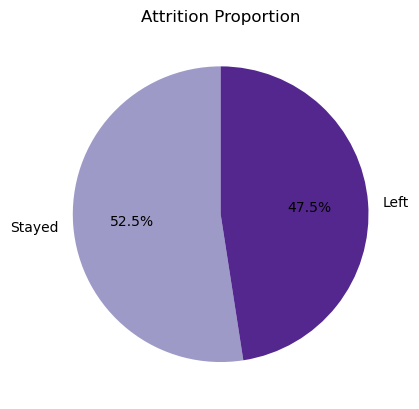

In [172]:
# Plotting the pie chart for attrition
# Count the proportions of 1s and 0s
attrition_counts = attrition_df['Attrition'].value_counts()

# Plotting the pie chart
attrition_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['#9e9ac8','#54278f'],
    labels=attrition_counts.index,
    ylabel='',
    title='Attrition Proportion'
)
plt.ylabel('')  # Remove the y-axis label
plt.show()

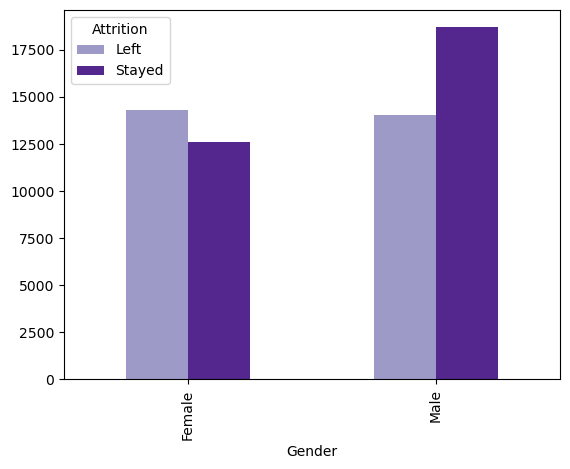

In [171]:
# Relationship between attrition and categorical variables

# Attririon & Gender
ax = attrition_df.groupby('Gender').Attrition.value_counts().unstack()
fig = ax.plot(kind='bar', stacked=False, color=['#9e9ac8','#54278f'])

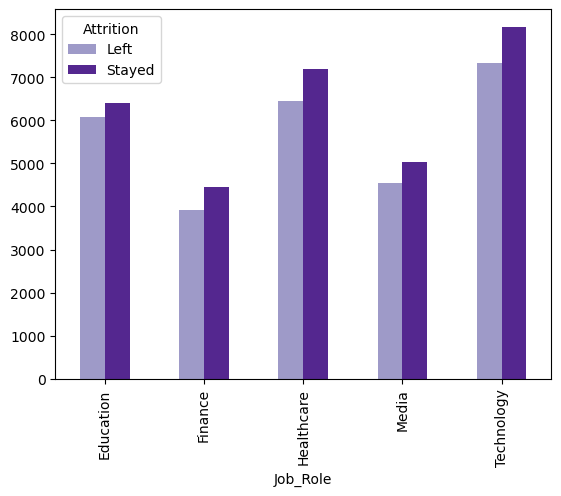

In [170]:
# Attririon & Job_Role
ax = attrition_df.groupby('Job_Role').Attrition.value_counts().unstack()
fig = ax.plot(kind='bar', stacked=False, color=['#9e9ac8','#54278f'])

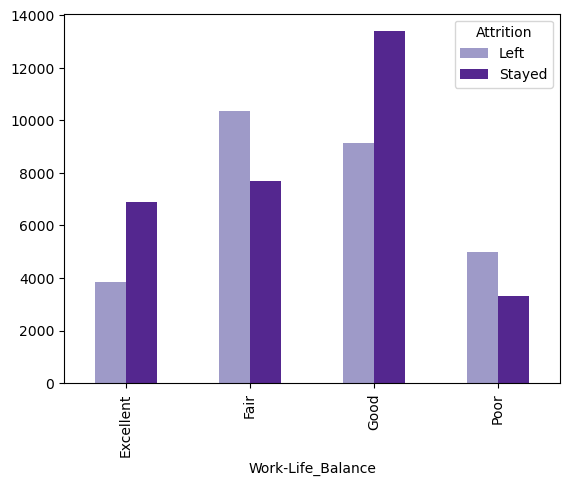

In [169]:
# Attririon & Work-Life_Balance
ax = attrition_df.groupby('Work-Life_Balance').Attrition.value_counts().unstack()
fig = ax.plot(kind='bar', stacked=False, color=['#9e9ac8','#54278f'])

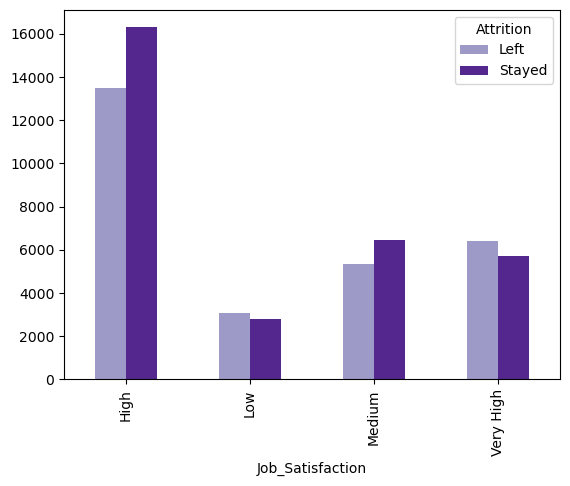

In [168]:
# Attririon & Job_Satisfaction
ax = attrition_df.groupby('Job_Satisfaction').Attrition.value_counts().unstack()
fig = ax.plot(kind='bar', stacked=False, color=['#9e9ac8','#54278f'])

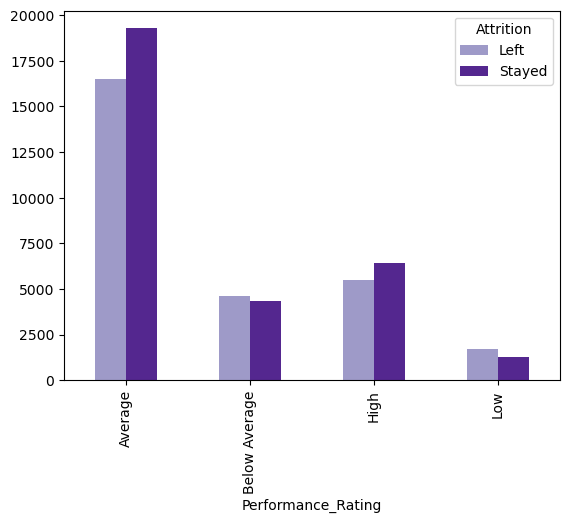

In [174]:
# Attririon & Performance_Rating
ax = attrition_df.groupby('Performance_Rating').Attrition.value_counts().unstack()
fig = ax.plot(kind='bar', stacked=False, color=['#9e9ac8','#54278f'])

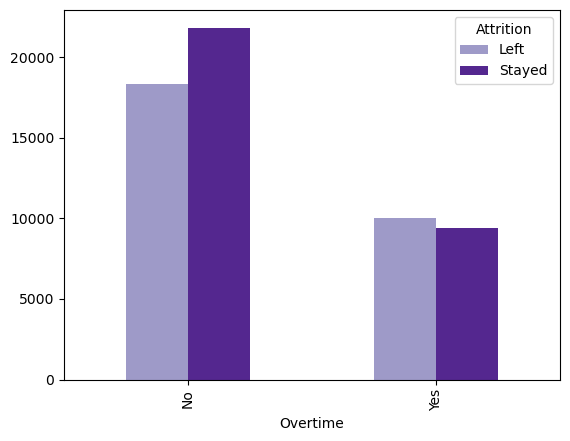

In [167]:
# Attririon & Overtime
ax = attrition_df.groupby('Overtime').Attrition.value_counts().unstack()
fig = ax.plot(kind='bar', stacked=False, color=['#9e9ac8','#54278f'])

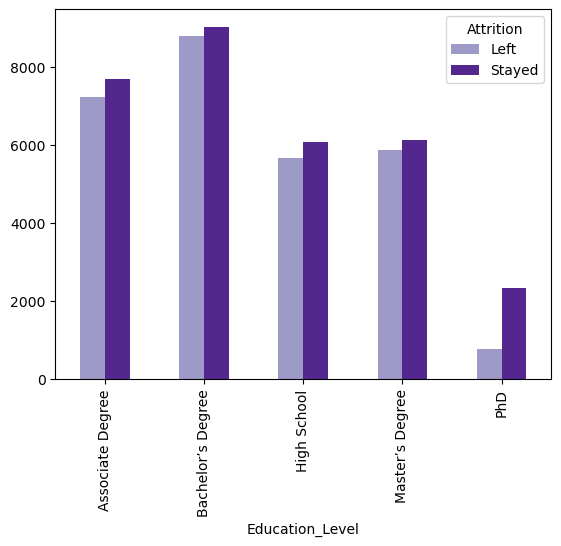

In [166]:
# Attririon & Education_Level
ax = attrition_df.groupby('Education_Level').Attrition.value_counts().unstack()
fig = ax.plot(kind='bar', stacked=False, color=['#9e9ac8','#54278f'])

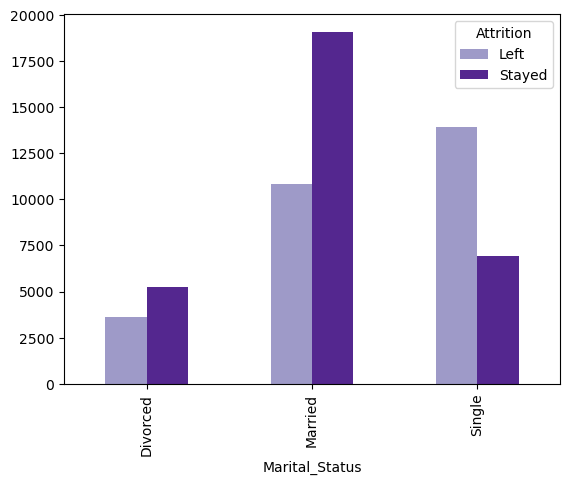

In [165]:
# Attririon & Marital_Status
ax = attrition_df.groupby('Marital_Status').Attrition.value_counts().unstack()
fig = ax.plot(kind='bar', stacked=False, color=['#9e9ac8','#54278f'])

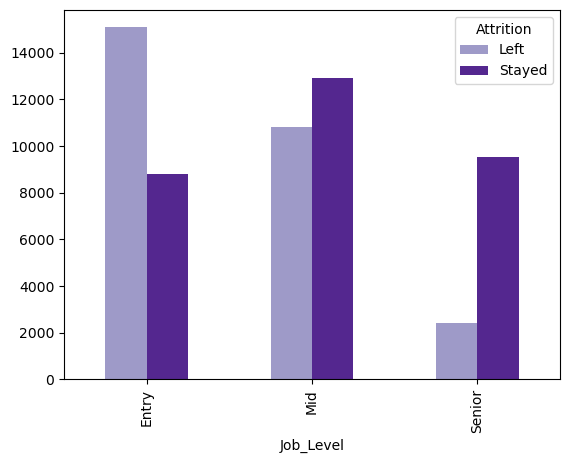

In [164]:
# Attririon & Job_Level
ax = attrition_df.groupby('Job_Level').Attrition.value_counts().unstack()
fig = ax.plot(kind='bar', stacked=False, color=['#9e9ac8','#54278f'])

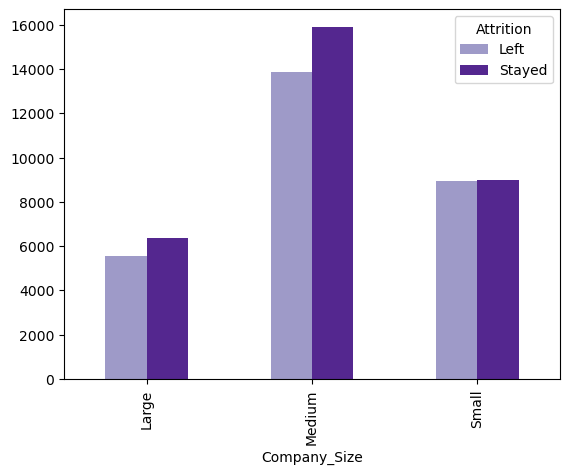

In [163]:
# Attririon & Company_Size
ax = attrition_df.groupby('Company_Size').Attrition.value_counts().unstack()
fig = ax.plot(kind='bar', stacked=False, color=['#9e9ac8','#54278f'])

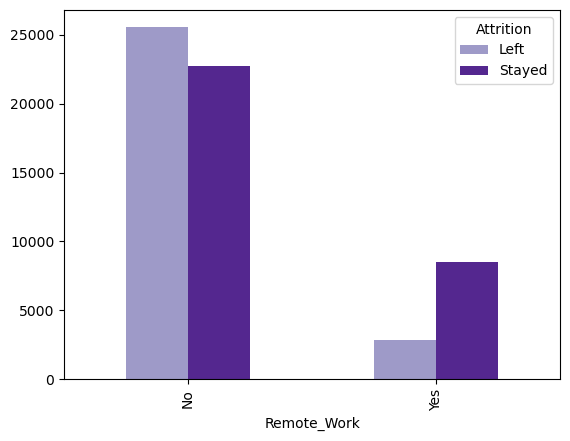

In [162]:
# Attririon & Remote_Work
ax = attrition_df.groupby('Remote_Work').Attrition.value_counts().unstack()
fig = ax.plot(kind='bar', stacked=False, color=['#9e9ac8','#54278f'])

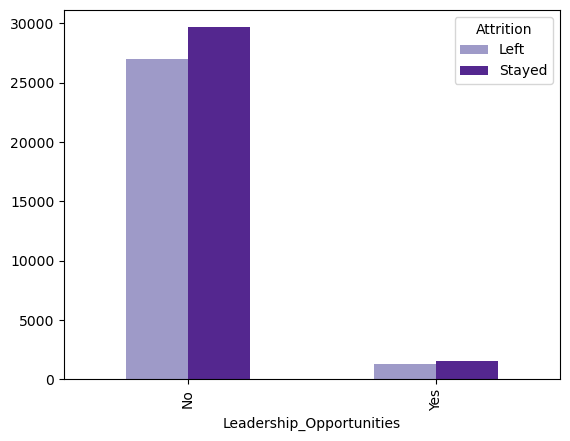

In [161]:
# Attririon & Leadership_Opportunities
ax = attrition_df.groupby('Leadership_Opportunities').Attrition.value_counts().unstack()
fig = ax.plot(kind='bar', stacked=False, color=['#9e9ac8','#54278f'])

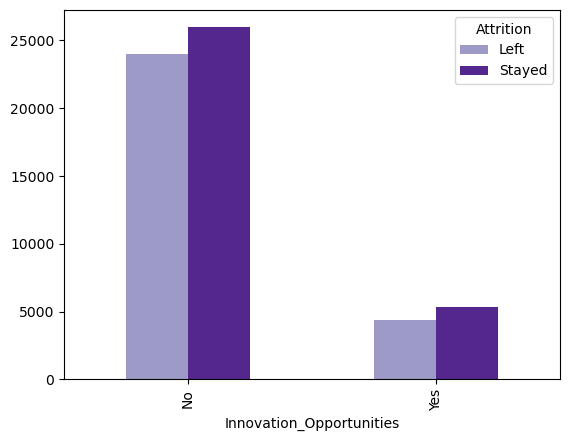

In [160]:
# Attririon & Innovation_Opportunities
ax = attrition_df.groupby('Innovation_Opportunities').Attrition.value_counts().unstack()
fig = ax.plot(kind='bar', stacked=False, color=['#9e9ac8','#54278f'])

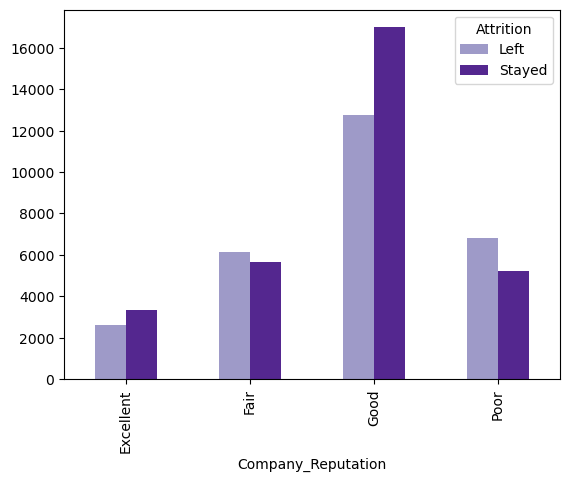

In [159]:
# Attririon & Company_Reputation
ax = attrition_df.groupby('Company_Reputation').Attrition.value_counts().unstack()
fig = ax.plot(kind='bar', stacked=False, color=['#9e9ac8','#54278f'])

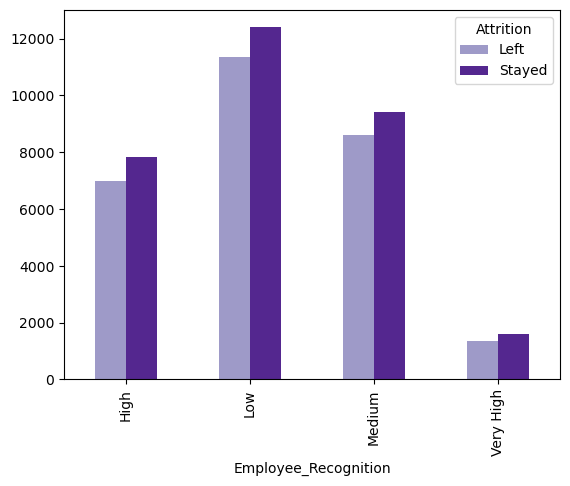

In [158]:
# Attririon & Employee_Recognition
ax = attrition_df.groupby('Employee_Recognition').Attrition.value_counts().unstack()
fig = ax.plot(kind='bar', stacked=False, color=['#9e9ac8','#54278f'])

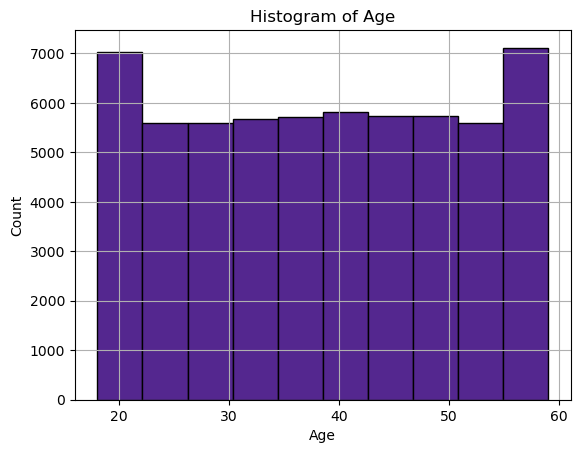

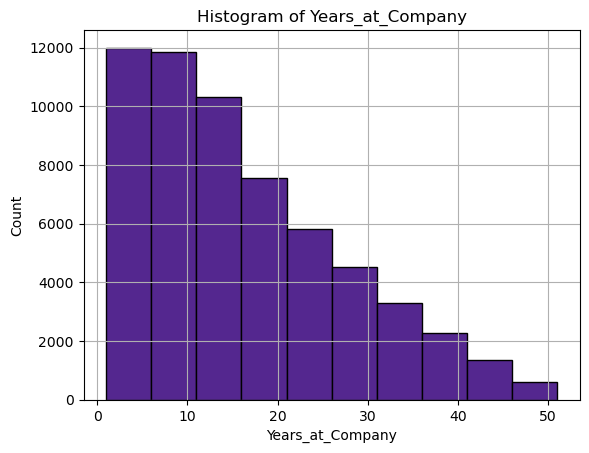

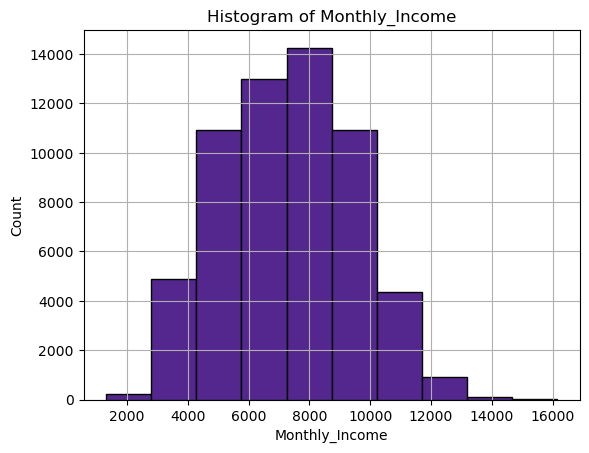

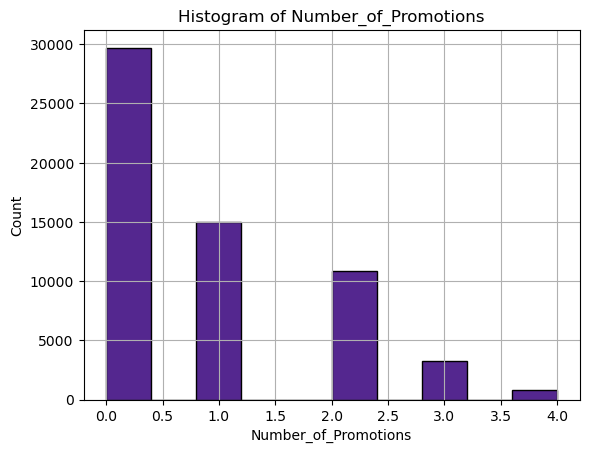

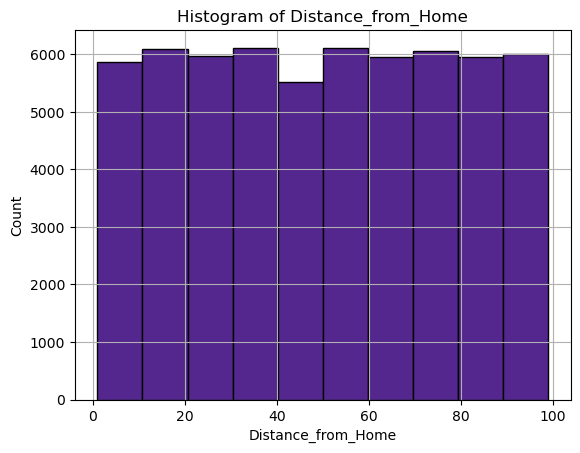

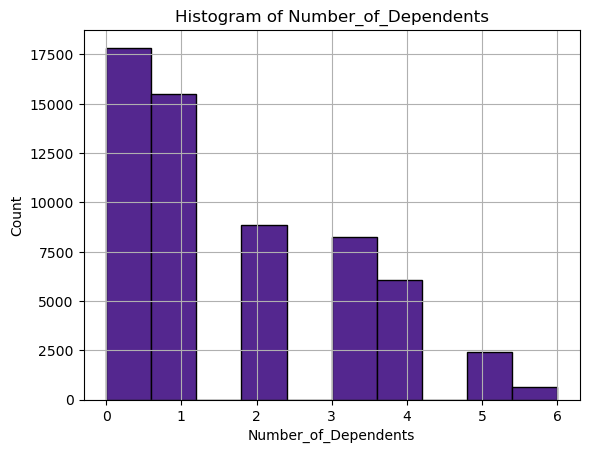

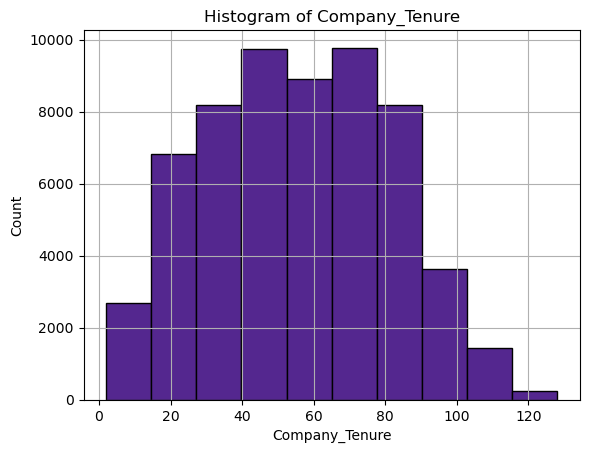

In [157]:
#Histograms for continuous variables

continuous_columns = attrition_df.select_dtypes(include=['int64']).columns
for column in continuous_columns:
    ax = attrition_df[column].hist(color='#54278f', edgecolor='black')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.set_title(f'Histogram of {column}')
    plt.show()

In [24]:
attrition_df.shape

(59598, 23)

In [25]:
attrition_df=attrition_df.drop_duplicates()
attrition_df.shape

(59598, 23)

##### No duplicates, clean dataset

### Correlation Analysis

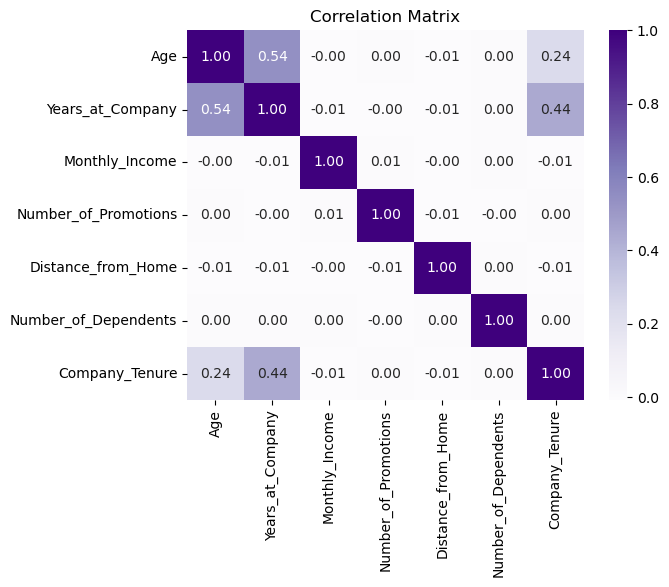

In [76]:
#Correlation between numerical variables

corr_matrix = attrition_df.corr(numeric_only=True)

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="Purples", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

##### No strong correlation between the continous variables

## Data Pre-processing

#### Data Partition

In [27]:
# Select predictors and variable attrition to classify
X = attrition_df.drop('Attrition', axis=1)
y = attrition_df['Attrition']

In [28]:
# split into training (60%) and testing (40%)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.40, random_state=1)
print(X_train.shape, y_train.shape)

(35758, 22) (35758,)


In [29]:
print(X_valid.shape, y_valid.shape)

(23840, 22) (23840,)


#### Divide categorical and continuous variables

In [30]:
# Divide categorical and numerical
categorical_cols = X.select_dtypes(include=['object']).columns
continuous_cols = X.select_dtypes(include=['int64']).columns

#### Normalize continuous variables

In [31]:
# Normalization of the data
scaler = preprocessing.StandardScaler()
scaler.fit(X_train[continuous_cols])

StandardScaler()

In [32]:
# Normalize numerical variables
X_train_norm = pd.DataFrame(
    scaler.transform(X_train[continuous_cols]),
    columns=continuous_cols,
    index=X_train.index
)

X_valid_norm = pd.DataFrame(
    scaler.transform(X_valid[continuous_cols]),
    columns=continuous_cols,
    index=X_valid.index
)

#### Create dummy variables for categoricals

In [33]:
# Create dummy variables for categorical columns
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_dummy = pd.DataFrame(
    encoder.fit_transform(X_train[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols),
    index=X_train.index
)
X_valid_dummy = pd.DataFrame(
    encoder.transform(X_valid[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols),
    index=X_valid.index
)

#### Make one dataset by combining the preprocess data

In [34]:
# Combine normalized continuous variables and encoded categorical variables
X_train_normdummy = pd.concat([X_train_norm, X_train_dummy], axis=1)
X_valid_normdummy = pd.concat([X_valid_norm, X_valid_dummy], axis=1)

In [35]:
X_train_normdummy.head()

,Age,Years_at_Company,Monthly_Income,Number_of_Promotions,Distance_from_Home,Number_of_Dependents,Company_Tenure,Gender_Male,Job_Role_Finance,Job_Role_Healthcare,...,Company_Size_Small,Remote_Work_Yes,Leadership_Opportunities_Yes,Innovation_Opportunities_Yes,Company_Reputation_Fair,Company_Reputation_Good,Company_Reputation_Poor,Employee_Recognition_Low,Employee_Recognition_Medium,Employee_Recognition_Very High
28130,-1.377525,-0.604466,-0.923367,1.170627,1.506063,-0.416199,0.636413,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
45802,0.615467,0.645107,1.206346,1.170627,-0.979900,-1.059597,1.738003,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11344,0.698508,1.805425,1.425424,-0.835424,-1.119954,-0.416199,0.242989,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
27756,0.864591,0.377342,0.781709,-0.835424,-0.524724,-0.416199,-0.032409,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
12646,1.528921,-1.318508,-0.410632,-0.835424,1.225955,-0.416199,-0.150436,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## K-Nearest Neighbors (KNN)

In [36]:
# Train a classifier for different values of k
results = []
for k in range(1, 17):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train_normdummy, y_train)
    results.append({
        'k': k,
        'accuracy': accuracy_score(y_valid, knn.predict(X_valid_normdummy))        
    })

In [37]:
# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1  0.609941
1    2  0.592659
2    3  0.639262
3    4  0.628943
4    5  0.655076
5    6  0.643498
6    7  0.664220
7    8  0.657550
8    9  0.669086
9   10  0.666275
10  11  0.675252
11  12  0.673448
12  13  0.683389
13  14  0.681376
14  15  0.688633
15  16  0.684815


#### With K=15 we have the highest accuracy, this will be our k value for the model

In [38]:
# Train the KNN model with k=15
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_normdummy, y_train)  # Use the normalized training data

# Make predictions on the validation set
y_pred_knn = knn.predict(X_valid_normdummy)  # Use the normalized validation data

### Results

In [39]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_valid, y_pred_knn)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[7595 3729]
 [3694 8822]]


In [40]:
# Accuracy Score
accuracy = accuracy_score(y_valid, y_pred_knn)
print("\nAccuracy:", accuracy)


Accuracy: 0.6886325503355705


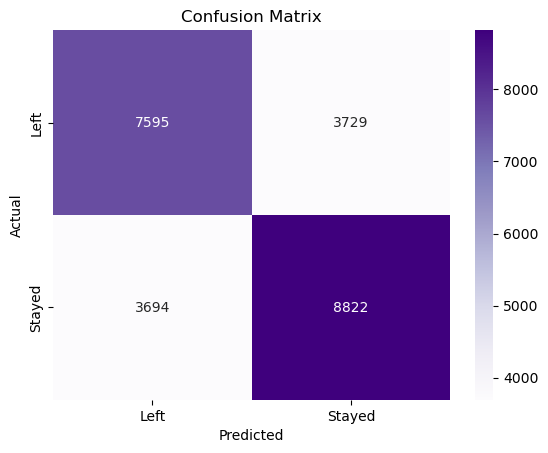

In [80]:
# Visualize the confusion matrix
class_labels = knn.classes_
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## CART for attrition

In [42]:
classTree = DecisionTreeClassifier(random_state=0, max_depth=7)
classTree.fit(X_train_normdummy, y_train)

DecisionTreeClassifier(max_depth=7, random_state=0)

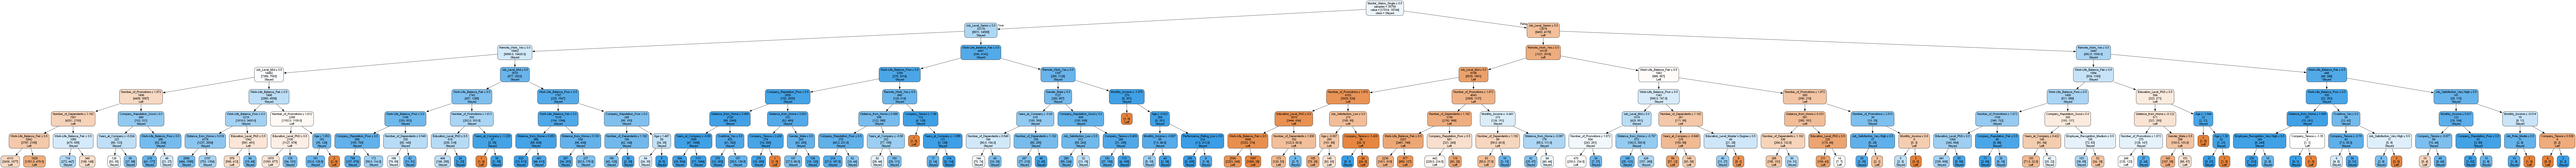

In [43]:
plotDecisionTree(classTree, feature_names=X_train_normdummy.columns, class_names=classTree.classes_)

In [44]:
# Make predictions on the validation set
y_pred_tree = classTree.predict(X_valid_normdummy)

### Results

In [45]:
# Confusion Matrix
cm = confusion_matrix(y_valid, y_pred_tree)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[8829 2495]
 [3948 8568]]


In [46]:
# Accuracy
accuracy = accuracy_score(y_valid, y_pred_tree)
print("\nAccuracy:", accuracy)


Accuracy: 0.729739932885906


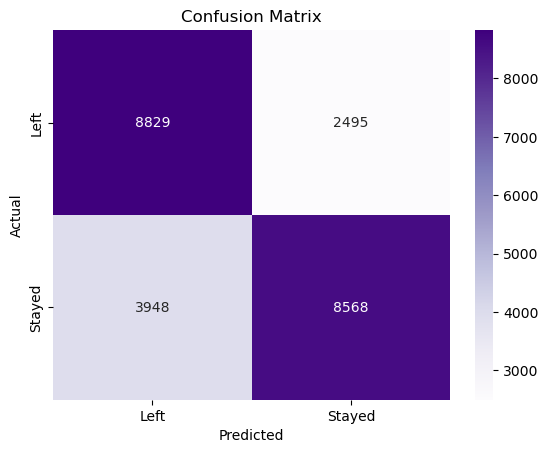

In [81]:
# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=classTree.classes_, yticklabels=classTree.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Naive Bayes Classifier for attrition

In [48]:
# Let's try first with MultinomialNB
attrition_nb = MultinomialNB(alpha=0.01)
attrition_nb.fit(X_train_dummy, y_train)

MultinomialNB(alpha=0.01)

In [49]:
y_pred_MultNB = attrition_nb.predict(X_valid_dummy)

### Results

In [50]:
# Confusion Matrix
print("Confusion Matrix:")
cmMult=confusion_matrix(y_valid, y_pred_MultNB)
print(cmMult)

Confusion Matrix:
[[7565 3759]
 [2919 9597]]


In [51]:
# Accuracy
accuracy = accuracy_score(y_valid, y_pred_MultNB)
print("\nAccuracy:", accuracy)


Accuracy: 0.7198825503355705


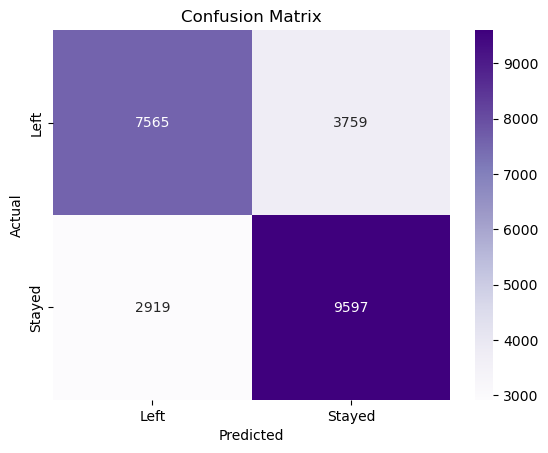

In [82]:
# Visualize the confusion matrix
class_labels = attrition_nb.classes_
sns.heatmap(cmMult, annot=True, fmt='d', cmap='Purples', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [53]:
# Now, let's try with GaussianNB
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train_normdummy[continuous_cols], y_train)

GaussianNB()

In [54]:
y_pred_GaussNB = gaussian_nb.predict(X_valid_normdummy[continuous_cols])

### Results

In [55]:
# Confusion Matrix
cmGau = confusion_matrix(y_valid, y_pred_GaussNB)
print("Confusion Matrix:")
print(cmGau)

Confusion Matrix:
[[6296 5028]
 [5298 7218]]


In [56]:
# Accuracy
accuracy = accuracy_score(y_valid, y_pred_GaussNB)
print("\nAccuracy:", accuracy)


Accuracy: 0.5668624161073825


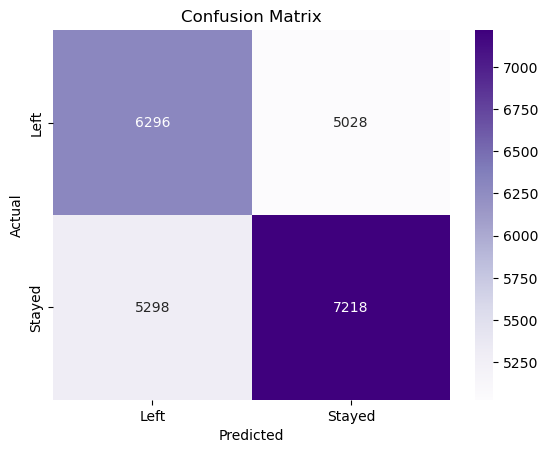

In [83]:
# Visualize the confusion matrix
class_labels = gaussian_nb.classes_
sns.heatmap(cmGau, annot=True, fmt='d', cmap='Purples', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Logistic Regression

In [58]:
# Fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')

In [59]:
logit_reg.fit(X_train_normdummy, y_train)

LogisticRegression(C=1e+42, solver='liblinear')

In [60]:
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X_train_normdummy.columns).transpose())
print()

intercept  0.2906005113275562
            Age  Years_at_Company  Monthly_Income  Number_of_Promotions  \
coeff  0.076908          0.152265        0.019131               0.23854   

       Distance_from_Home  Number_of_Dependents  Company_Tenure  Gender_Male  \
coeff           -0.286801              0.237878       -0.009994     0.618391   

       Job_Role_Finance  Job_Role_Healthcare  ...  Company_Size_Small  \
coeff          0.112239             0.091508  ...           -0.209698   

       Remote_Work_Yes  Leadership_Opportunities_Yes  \
coeff         1.732968                      0.217144   

       Innovation_Opportunities_Yes  Company_Reputation_Fair  \
coeff                      0.116138                -0.505187   

       Company_Reputation_Good  Company_Reputation_Poor  \
coeff                 0.041335                -0.794334   

       Employee_Recognition_Low  Employee_Recognition_Medium  \
coeff                 -0.054514                    -0.034498   

       Employee_Recog

In [61]:
df = len(X_train_normdummy.columns) + 1
log_likelihood = -log_loss(y_train, logit_reg.predict_proba(X_train_normdummy), normalize=False)
AIC = 2 * df - 2 * log_likelihood
print('AIC:', AIC)

AIC: 34794.29815096848


In [62]:
y_predLog = logit_reg.predict(X_valid_normdummy)

### Results

In [63]:
# Confusion Matrix
cmLog = confusion_matrix(y_valid, y_predLog)
print("Confusion Matrix:")
print(cmLog)

Confusion Matrix:
[[8249 3075]
 [2833 9683]]


In [64]:
# Accuracy
accuracy = accuracy_score(y_valid, y_predLog)
print("\nAccuracy:", accuracy)


Accuracy: 0.7521812080536913


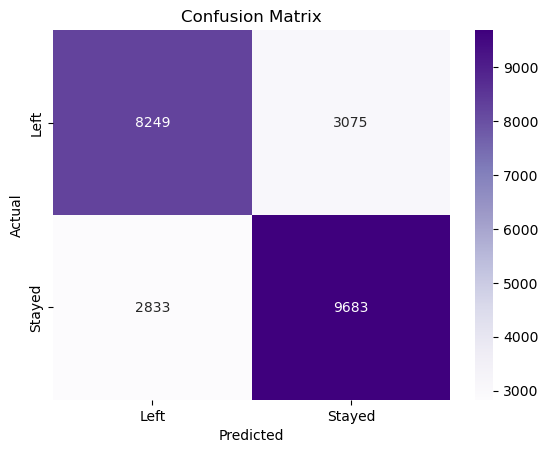

In [94]:
# Visualize the confusion matrix
sns.heatmap(cmLog, annot=True, fmt='d', cmap='Purples', xticklabels=logit_reg.classes_, yticklabels=logit_reg.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Gradient Boosting

In [67]:
# Now Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=0)

In [68]:
gbc.fit(X_train_normdummy, y_train)

GradientBoostingClassifier(random_state=0)

In [69]:
# Make predictions
y_pred_gbc = gbc.predict(X_valid_normdummy)

### Results

In [70]:
# Confusion Matrix
cmgbc = confusion_matrix(y_valid, y_pred_gbc)
print("Confusion Matrix:")
print(cmgbc)

Confusion Matrix:
[[8290 3034]
 [2700 9816]]


In [71]:
# Accuracy
accuracy = accuracy_score(y_valid, y_pred_gbc)
print("\nAccuracy:", accuracy)


Accuracy: 0.759479865771812


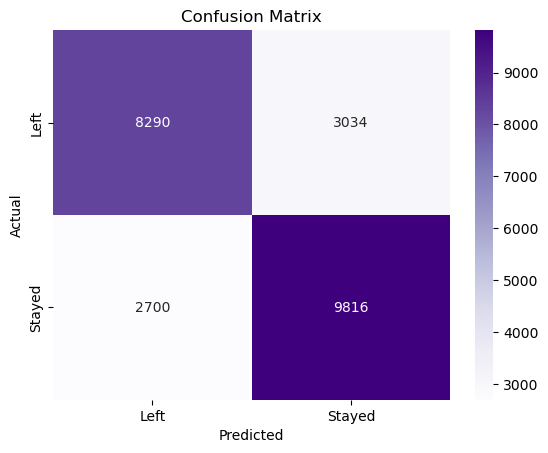

In [95]:
# Visualize the confusion matrix
sns.heatmap(cmgbc, annot=True, fmt='d', cmap='Purples', xticklabels=logit_reg.classes_, yticklabels=logit_reg.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Random Forest

In [87]:
# Now Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)

In [88]:
rf.fit(X_train_normdummy, y_train)

RandomForestClassifier(random_state=0)

In [89]:
# Make predictions
y_pred_rf = rf.predict(X_valid_normdummy)

### Results

In [91]:
# Confusion Matrix
cmrf = confusion_matrix(y_valid, y_pred_rf)
print("Confusion Matrix:")
print(cmrf)

Confusion Matrix:
[[8160 3164]
 [2913 9603]]


In [92]:
# Accuracy
accuracy = accuracy_score(y_valid, y_pred_rf)
print("\nAccuracy:", accuracy)


Accuracy: 0.7450922818791946


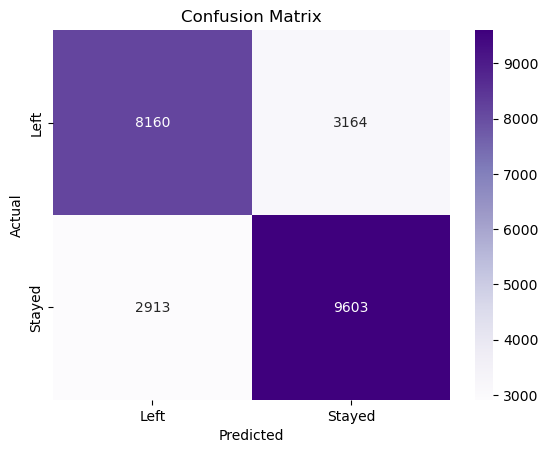

In [96]:
# Visualize the confusion matrix
sns.heatmap(cmrf, annot=True, fmt='d', cmap='Purples', xticklabels=logit_reg.classes_, yticklabels=logit_reg.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Neural Network

In [107]:
# Now Neural Network
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=0)

In [108]:
mlp.fit(X_train_normdummy, y_train)

MLPClassifier(max_iter=500, random_state=0)

In [109]:
# Make predictions
y_pred_mlp = mlp.predict(X_valid_normdummy)

### Results

In [110]:
# Confusion Matrix
cmnn = confusion_matrix(y_valid, y_pred_mlp)
print("Confusion Matrix:")
print(cmnn)

Confusion Matrix:
[[7799 3525]
 [3020 9496]]


In [111]:
# Accuracy
accuracy = accuracy_score(y_valid, y_pred_mlp)
print("\nAccuracy:", accuracy)


Accuracy: 0.7254614093959731


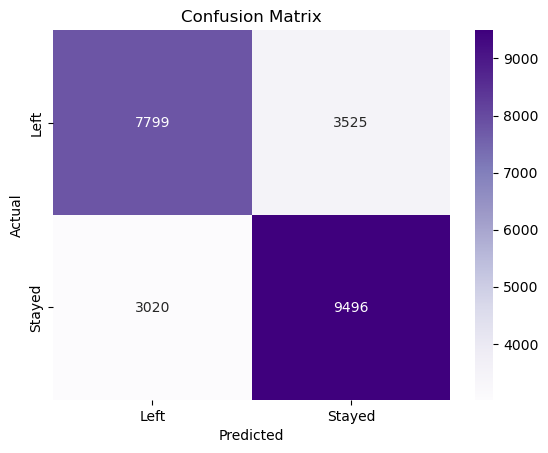

In [112]:
# Visualize the confusion matrix
sns.heatmap(cmnn, annot=True, fmt='d', cmap='Purples', xticklabels=logit_reg.classes_, yticklabels=logit_reg.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Comparing Results

In [118]:
# Specify the correct labels
labels = ['Left', 'Stayed']

In [138]:
# Initialize results 
results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

# K-NN 15
results["Model"].append("K-NN 15")
results["Accuracy"].append(accuracy_score(y_valid, y_pred_knn))
results["Precision"].append(precision_score(y_valid, y_pred_knn, average='weighted', labels=labels))
results["Recall"].append(recall_score(y_valid, y_pred_knn, average='weighted', labels=labels))
results["F1-Score"].append(f1_score(y_valid, y_pred_knn, average='weighted', labels=labels))

# Decision tree CART
results["Model"].append("Decision tree CART")
results["Accuracy"].append(accuracy_score(y_valid, y_pred_tree))
results["Precision"].append(precision_score(y_valid, y_pred_tree, average='weighted', labels=labels))
results["Recall"].append(recall_score(y_valid, y_pred_tree, average='weighted', labels=labels))
results["F1-Score"].append(f1_score(y_valid, y_pred_tree, average='weighted', labels=labels))

# Multinomial Naive Bayes
#results["Model"].append("Multinomial Naive Bayes")
#results["Accuracy"].append(accuracy_score(y_valid, y_pred_MultNB))
#results["Precision"].append(precision_score(y_valid, y_pred_MultNB, average='weighted', labels=labels))
#results["Recall"].append(recall_score(y_valid, y_pred_MultNB, average='weighted', labels=labels))
#results["F1-Score"].append(f1_score(y_valid, y_pred_MultNB, average='weighted', labels=labels))

# Gaussian Naive Bayes
#results["Model"].append("Gaussian Naive Bayes")
#results["Accuracy"].append(accuracy_score(y_valid, y_pred_GaussNB))
#results["Precision"].append(precision_score(y_valid, y_pred_GaussNB, average='weighted', labels=labels))
#results["Recall"].append(recall_score(y_valid, y_pred_GaussNB, average='weighted', labels=labels))
#results["F1-Score"].append(f1_score(y_valid, y_pred_GaussNB, average='weighted', labels=labels))

# Logistic Regression
results["Model"].append("Logistic Regression")
results["Accuracy"].append(accuracy_score(y_valid, y_predLog))
results["Precision"].append(precision_score(y_valid, y_predLog, average='weighted', labels=labels))
results["Recall"].append(recall_score(y_valid, y_predLog, average='weighted', labels=labels))
results["F1-Score"].append(f1_score(y_valid, y_predLog, average='weighted', labels=labels))

# Gradient Boosting
results["Model"].append("Gradient Boosting")
results["Accuracy"].append(accuracy_score(y_valid, y_pred_gbc))
results["Precision"].append(precision_score(y_valid, y_pred_gbc, average='weighted', labels=labels))
results["Recall"].append(recall_score(y_valid, y_pred_gbc, average='weighted', labels=labels))
results["F1-Score"].append(f1_score(y_valid, y_pred_gbc, average='weighted', labels=labels))

# Random Forest
results["Model"].append("Random Forest")
results["Accuracy"].append(accuracy_score(y_valid, y_pred_rf))
results["Precision"].append(precision_score(y_valid, y_pred_rf, average='weighted', labels=labels))
results["Recall"].append(recall_score(y_valid, y_pred_rf, average='weighted', labels=labels))
results["F1-Score"].append(f1_score(y_valid, y_pred_rf, average='weighted', labels=labels))

# Neural Network (MLP)
results["Model"].append("Neural Network (MLP)")
results["Accuracy"].append(accuracy_score(y_valid, y_pred_mlp))
results["Precision"].append(precision_score(y_valid, y_pred_mlp, average='weighted', labels=labels))
results["Recall"].append(recall_score(y_valid, y_pred_mlp, average='weighted', labels=labels))
results["F1-Score"].append(f1_score(y_valid, y_pred_mlp, average='weighted', labels=labels))


In [139]:
# Convert to DataFrame
results_df = pd.DataFrame(results)

In [140]:
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,K-NN 15,0.688633,0.688588,0.688633,0.688609
1,Decision tree CART,0.729740,0.734827,0.729740,0.729560
2,Logistic Regression,0.752181,0.752033,0.752181,0.752029
3,Gradient Boosting,0.759480,0.759346,0.759480,0.759263
4,Random Forest,0.745092,0.744932,0.745092,0.744929
5,Neural Network (MLP),0.725461,0.725283,0.725461,0.725045


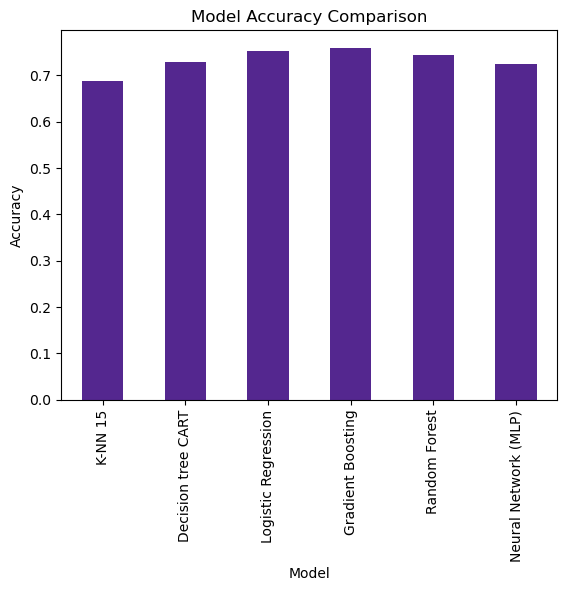

In [175]:
results_df.plot.bar(x='Model', y='Accuracy', legend=False, color='#54278f')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=90)
plt.show()

### Variable Importance by Gradient Boosting

#### This reveals the top predictors for attrition

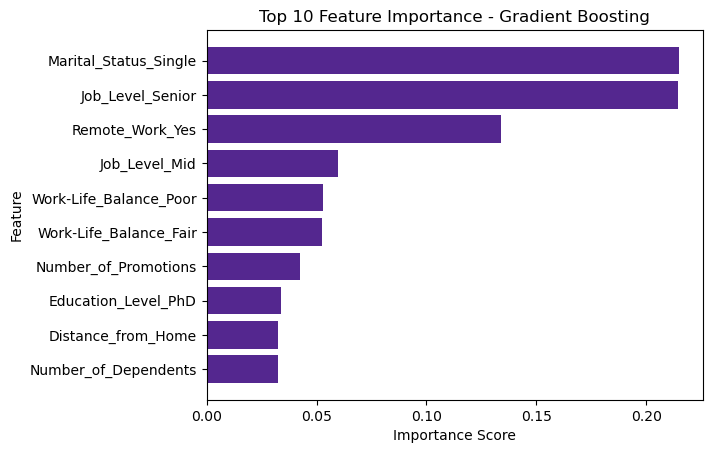

In [176]:
feature_importance = gbc.feature_importances_
sorted_idx = np.argsort(feature_importance)[-10:]
plt.barh(X_train_normdummy.columns[sorted_idx], feature_importance[sorted_idx], color='#54278f')
plt.title("Top 10 Feature Importance - Gradient Boosting")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()